# **Lending Club EDA - Case Study**
###Idhaya R and Yash Yennam - 08/12/2021

##Problem Statement:
**Introduction**

Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.


**Business Understanding**

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

*   If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
*   If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

##Importing Required Packages
The code makes use of multiple Packages some of important packages used in Notebook are


*   Pandas
*   Numpy
*   Matplotlib
*   Seaborn
*   Geopandas
*   Ploty

The packages provide pre-built methods to facilitate various tasks required for Exploratory Data Analysis

Next, We import the dataset loan.csv as an Pandas dataframe and Check a simple shape (Length and Breadth) of the dataframe. Which helps us to get a fair idea of initiating Data Cleaning



In [1]:
# Importing required Packages and Libraries 
!pip install adjustText
!pip install geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pprint import pprint
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
import adjustText as aT

In [2]:
# Reading the CSV file as Pandas dataframe
loan = pd.read_csv('/content/drive/MyDrive/Upgrad_Project/loan.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
# Shape i.e. length and breadth of the Data frame
len_df, num_col = loan.shape
print(len_df, num_col)

39717 111


##**Data Cleaning**
According to [wiki](https://en.wikipedia.org/wiki/Data_cleansing) Data Cleaning can be defined as:

*The process of detecting and correcting corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.*

Given the shape of dataframe, we can see that there are number of rows and columns. We can check in each column for percentage of values which are either Missing or irrelavent to the business problem we are trying to solve.

Next, We can safely drop columns which has missing data of more than 50%. In this way we assure that there are no bias or noise in the dataset

In [4]:
# Finding Percentage of Missing values in Each Column
missingdata_percentage = round(100*(loan.isnull().sum()/len_df), 2)

In [5]:
# Converting the Pandas Series to Dict for better visualization
missingdata_percentage.to_dict()

{'acc_now_delinq': 0.0,
 'acc_open_past_24mths': 100.0,
 'addr_state': 0.0,
 'all_util': 100.0,
 'annual_inc': 0.0,
 'annual_inc_joint': 100.0,
 'application_type': 0.0,
 'avg_cur_bal': 100.0,
 'bc_open_to_buy': 100.0,
 'bc_util': 100.0,
 'chargeoff_within_12_mths': 0.14,
 'collection_recovery_fee': 0.0,
 'collections_12_mths_ex_med': 0.14,
 'delinq_2yrs': 0.0,
 'delinq_amnt': 0.0,
 'desc': 32.58,
 'dti': 0.0,
 'dti_joint': 100.0,
 'earliest_cr_line': 0.0,
 'emp_length': 2.71,
 'emp_title': 6.19,
 'funded_amnt': 0.0,
 'funded_amnt_inv': 0.0,
 'grade': 0.0,
 'home_ownership': 0.0,
 'id': 0.0,
 'il_util': 100.0,
 'initial_list_status': 0.0,
 'inq_fi': 100.0,
 'inq_last_12m': 100.0,
 'inq_last_6mths': 0.0,
 'installment': 0.0,
 'int_rate': 0.0,
 'issue_d': 0.0,
 'last_credit_pull_d': 0.01,
 'last_pymnt_amnt': 0.0,
 'last_pymnt_d': 0.18,
 'loan_amnt': 0.0,
 'loan_status': 0.0,
 'max_bal_bc': 100.0,
 'member_id': 0.0,
 'mo_sin_old_il_acct': 100.0,
 'mo_sin_old_rev_tl_op': 100.0,
 'mo_sin_rc

In [6]:
# Removing column with values less than 50%
loan = loan.drop(list(missingdata_percentage[missingdata_percentage >= 50].index),axis=1)
print("Number of Columns deleted = {}".format(num_col - loan.shape[1]))

Number of Columns deleted = 57


We have dropped Columns which have less than 50% of data.

Next, We can counter columns which has data which is partially filled. Let us handle these columns

In [7]:
# Finding Columns which are partially filled
missingdata_percentage = round(100*(loan.isnull().sum()/len_df), 2)
missingdata_percentage[missingdata_percentage > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [8]:
# Checking for Unique Values in these columns 
columns_work = list(missingdata_percentage[missingdata_percentage > 0].index)
for name in columns_work:
  unique_vals = loan[name].unique()
  print(name, unique_vals.size)

emp_title 28821
emp_length 12
desc 26528
title 19616
revol_util 1090
last_pymnt_d 102
last_credit_pull_d 107
collections_12_mths_ex_med 2
chargeoff_within_12_mths 2
pub_rec_bankruptcies 4
tax_liens 2


In [9]:
# Checking for Columns which has only 1 Uniqe Values
columns_work = list(loan.columns)
for name in columns_work:
  unique_vals = loan[name].unique()
  if unique_vals.size == 1:
    print(name, unique_vals.size)

pymnt_plan 1
initial_list_status 1
policy_code 1
application_type 1
acc_now_delinq 1
delinq_amnt 1


Since *'collections_12_mths_ex_med', 'chargeoff_within_12_mths','tax_liens'* are holding values only for 0 and NaN we can safely drop those column

Also, we can drop other columns with irrelavent data which won't help us much with analysis, like *'zip_code', 'id', 'member_id', 'desc'*

In [10]:
# Dropping unwanted Columns from the dataframe
loan = loan.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens', 'pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'delinq_amnt', 'url', 'acc_now_delinq', 'out_prncp',
                  'out_prncp_inv', 'zip_code', 'id', 'member_id', 'desc'],axis=1)

print("Number of Columns deleted = {}".format(num_col - loan.shape[1]))

Number of Columns deleted = 73


We are done with handling Columns, Next we can focus on eliminating rows with Values which are not relavent or which are empty

In [11]:
# Checking Columns where rows are Null/NaN
missingdata_percentage = round(100*(loan.isnull().sum()/len(loan.loan_status)), 2) 
missingdata_percentage[missingdata_percentage > 0]

emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

As we can see that there are multiple columns with Values which are empty. For benifit of our Analysis, We Can drop these rows

In [12]:
#Dropping off other NaN rows
loan=loan[~loan["emp_title"].isnull()]
loan=loan[~loan["emp_length"].isnull()]
loan=loan[~loan["title"].isnull()]
loan=loan[~loan["revol_util"].isnull()]
loan=loan[~loan["last_pymnt_d"].isnull()]
loan=loan[~loan["last_credit_pull_d"].isnull()]
loan=loan[~loan["pub_rec_bankruptcies"].isnull()]

We have dropped Unwanted Rows and Columns now, For Sanity Check we can run Check if we have All Aspects of dropping Values covered

In [13]:
# Sanity Check for Clear Data Frame
missingdata_percentage = round(100*(loan.isnull().sum()/len(loan.loan_status)), 2) 
missingdata_percentage[missingdata_percentage > 0]

Series([], dtype: float64)

Next, In Order to get Correct Business Stand point of Defaulters, we will be filtering out records which are currently paying the loans, Because we won't be able to classify the member has Fully Paid the Loan or will default the Loan.

In [14]:
# Filtering out Current Individuals to find only required default values
loan = loan[(loan.loan_status.isin(["Fully Paid","Charged Off"]))]

###Checking and removing Outliers
According to [wiki](https://en.wikipedia.org/wiki/Outlier):

*In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.*

For Correct Analysis and to mitigate Bias Values, we can structure the data in such a way, so as to eliminate the Outlier Values.

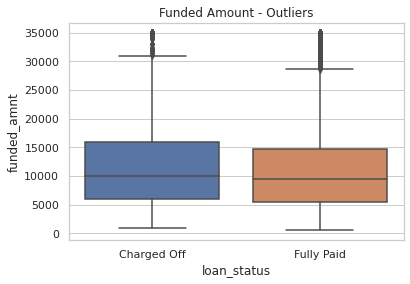

In [15]:
# Checking for Outliers in Funded Amount
sns.set_style("whitegrid")
plt.title("Funded Amount - Outliers")
sns.boxplot(x = 'loan_status', y = 'funded_amnt', data = loan)

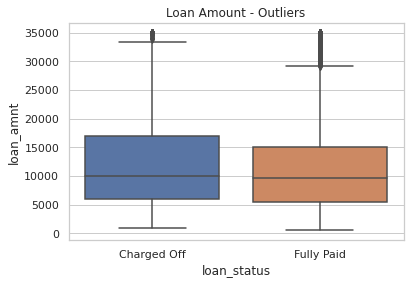

In [16]:
# Checking for Outliers in Loan Amount
plt.title("Loan Amount - Outliers")
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan)

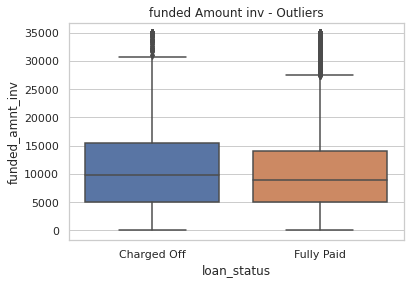

In [17]:
# Checking for Outliers in Funded Amount inv
plt.title("funded Amount inv - Outliers")
sns.boxplot(x = 'loan_status', y = 'funded_amnt_inv', data = loan)

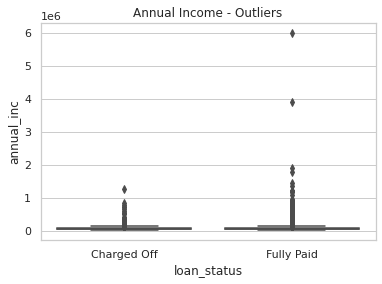

In [18]:
# Checking for Outliers in Funded Amount inv
plt.title("Annual Income - Outliers")
sns.boxplot(x = 'loan_status', y = 'annual_inc', data = loan)

In [19]:
# Checking and removing all the outliers which are below 25% and abouve 75% of the Data
Q1 = np.percentile(loan['funded_amnt'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(loan['funded_amnt'], 75,
                   interpolation = 'midpoint')

cols = ['funded_amnt', 'loan_amnt', 'funded_amnt_inv', 'annual_inc']

Q1 = loan[cols].quantile(0.25)
Q3 = loan[cols].quantile(0.75)
IQR = Q3 - Q1

loan = loan[~((loan[cols] < (Q1 - 1.5 * IQR)) |(loan[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [20]:
IQR

funded_amnt         9500.0
loan_amnt           9500.0
funded_amnt_inv     9300.0
annual_inc         41000.0
dtype: float64

Checking for data After Eliminating Outliers

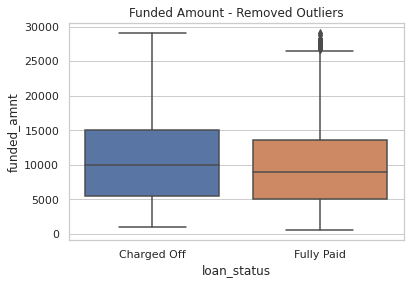

In [21]:
# Box Plot for Outliers in Funded Amount
plt.title("Funded Amount - Removed Outliers")
sns.boxplot(x = 'loan_status', y = 'funded_amnt', data = loan)

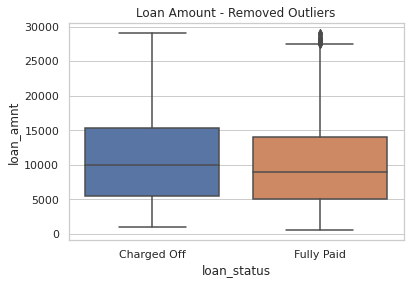

In [22]:
# Box Plot for Outliers in Loan Amount
plt.title("Loan Amount - Removed Outliers")
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan)

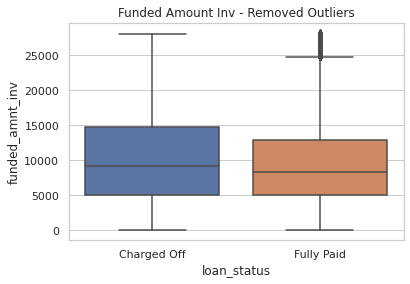

In [23]:
# Box Plot for Outliers in Funded Amount Inv
plt.title("Funded Amount Inv - Removed Outliers")
sns.boxplot(x = 'loan_status', y = 'funded_amnt_inv', data = loan)

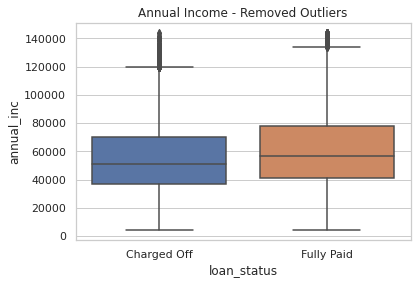

In [24]:
# Box Plot for Outliers in Annual Income
plt.title("Annual Income - Removed Outliers")
sns.boxplot(x = 'loan_status', y = 'annual_inc', data = loan)

Next, We Clean the data further by taking care of other aspects like, Dropping Duplicate Values, Removing Trailing Spaces, Converting string date to be correctly parsed as datetime object, standardizing values etc

In [25]:
# Drop Duplicates if any
loan = loan.drop_duplicates()

In [26]:
# Removing Trailing Spaces in entire dataframe
loan = loan.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [27]:
# Converting Datetime columns to parse the date
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

In [28]:
# Converting correct data type for the % value
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

In [29]:
#Converting String data to categorical data
emp_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}
loan = loan.replace({"emp_length": emp_dict})

In [30]:
# Converting string 36 and 60 months repay period to int objects
loan['term'] = loan.term.apply(lambda x: int(x.split()[0]))

Here, we can derive new columns with help of Date columns. This step can help us with analysis which can be used to determine the trends of the business

In [31]:
# Create new columns which are derived from the date columns
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

Cleaning the Y2K Date error in order to ensure sanity in the code

In [32]:
# Checking for Y2K Error
loan['earliest_cr_line_year'].unique()

array([1999, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991, 1993, 2001,
       1997, 1983, 1985, 2002, 1984, 2006, 2000, 1994, 1995, 1992, 1986,
       1990, 1988, 1980, 2008, 1979, 1981, 1987, 1971, 1972, 1970, 1975,
       1978, 1982, 2068, 1974, 1977, 2067, 1973, 1969, 1976, 2063, 2065,
       2062, 2066, 2056, 2046, 2050, 2064, 2054])

In [33]:
# Resolving Y2K Error
loan.loc[loan['earliest_cr_line_year'] > 2008 , 'earliest_cr_line_year'] = loan['earliest_cr_line_year'] - 100
loan['earliest_cr_line_year'].unique()

array([1999, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991, 1993, 2001,
       1997, 1983, 1985, 2002, 1984, 2006, 2000, 1994, 1995, 1992, 1986,
       1990, 1988, 1980, 2008, 1979, 1981, 1987, 1971, 1972, 1970, 1975,
       1978, 1982, 1968, 1974, 1977, 1967, 1973, 1969, 1976, 1963, 1965,
       1962, 1966, 1956, 1946, 1950, 1964, 1954])

## **Data Analysis**

We now step into Analysis of the data which has been cleaned. For Data Analysis, We can Classify it into Broad Terms:

1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

For sake of this case study, we will be focusing examples from Univariate Analysis and Bivariate Analysis.

These anaylsis can help give Driving Factors for taking key business decisions in order to lend out loans on different Parameters. 

[**Univariate Analysis**](https://en.wikipedia.org/wiki/Univariate_analysis)

*Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.*

Building on this, we go ahead and point out various Univariate Analysis results.

In [34]:
# Description of Data
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,10268.542489,10046.356601,9640.518336,41.749803,11.843962,301.644669,4.912898,60957.386075,13.539573,0.145190,0.858968,9.199059,0.055994,12206.686980,48.994186,21.662003,11078.329946,10642.047873,9066.365144,1929.408329,1.242578,81.313977,10.557553,2514.386228,0.043065,6.909985,1997.081578,7.131411,2010.337299
std,6234.173802,6028.902882,5950.816336,10.243936,3.619067,180.877899,3.520589,27410.971923,6.626835,0.492914,1.055756,4.329235,0.239356,13494.720442,28.175576,11.184367,7525.312343,7418.609898,6070.802977,1991.499094,6.700119,580.568704,133.471920,3900.520616,0.203753,3.537870,6.485405,3.378754,0.815702
min,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,0.000000,4000.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000,1.000000,1946.000000,1.000000,2007.000000
25%,5000.000000,5000.000000,5000.000000,36.000000,8.900000,163.670000,2.000000,40000.000000,8.480000,0.000000,0.000000,6.000000,0.000000,3629.000000,25.800000,13.000000,5466.852232,5134.505000,4500.000000,633.915000,0.000000,0.000000,0.000000,216.430000,0.000000,4.000000,1994.000000,4.000000,2010.000000
50%,9000.000000,9000.000000,8434.507508,36.000000,11.710000,267.820000,4.000000,56000.000000,13.680000,0.000000,1.000000,8.000000,0.000000,8532.000000,49.500000,20.000000,9369.845446,8945.545000,8000.000000,1256.665000,0.000000,0.000000,0.000000,548.895000,0.000000,7.000000,1998.000000,7.000000,2011.000000
75%,14400.000000,14000.000000,13150.000000,36.000000,14.270000,398.675000,9.000000,77000.000000,18.780000,0.000000,1.000000,12.000000,0.000000,15977.750000,72.300000,28.000000,15163.541678,14587.335000,12172.745000,2497.792500,0.000000,0.000000,0.000000,3325.785000,0.000000,10.000000,2001.000000,10.000000,2011.000000
max,29100.000000,29100.000000,28200.000000,60.000000,24.400000,1021.000000,10.000000,144000.000000,29.990000,11.000000,8.000000,44.000000,4.000000,149000.000000,99.900000,90.000000,45560.540060,45084.690000,29100.000000,17704.040000,166.429711,21810.310000,7002.190000,28412.430000,2.000000,12.000000,2008.000000,12.000000,2011.000000


Metadata of the Loan Data. Metadata is often know as data of data, which in sense gives feel of what exactly lies in the data so as to figure out what can be derived from this dataset

In [35]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 1 to 39680
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                32950 non-null  int64         
 1   funded_amnt              32950 non-null  int64         
 2   funded_amnt_inv          32950 non-null  float64       
 3   term                     32950 non-null  int64         
 4   int_rate                 32950 non-null  float64       
 5   installment              32950 non-null  float64       
 6   grade                    32950 non-null  object        
 7   sub_grade                32950 non-null  object        
 8   emp_title                32950 non-null  object        
 9   emp_length               32950 non-null  int64         
 10  home_ownership           32950 non-null  object        
 11  annual_inc               32950 non-null  float64       
 12  verification_status      32950 n

A General Question in Lending Busiess would be what is an average lending rate for the loans, this can be simply answered using mean of all the intrest rates.

In [36]:
# Average Intrest rate
loan.describe().int_rate.loc["mean"]

11.843961760243289

While Investing in Lending Business, One of the Driving factors can be percentage of Loans which are defaulted, and it's trend to provide sufficient risk cover.

Here from the Analysis, We can Derive our 1st Driver Point for Business:

**Driver Point No.1**
1. Approx. 14% of lenders have defaulted the loan.
2. On the flip side, Lending club performance is increasing by every year, with higher percentage of fully paid loans and lower percentage of defaulter by every passing year.

In [37]:
# Percentage of defaulted loans
defaulted = (loan[loan['loan_status'] == "Charged Off"].shape[0]/loan.shape[0]) * 100
paid = 100 - defaulted
print("Loans Defaulted : {}% \nLoans Repaid : {}%".format(defaulted, paid))

Loans Defaulted : 13.863429438543248% 
Loans Repaid : 86.13657056145675%


[Text(0, 0.5, '(%)')]

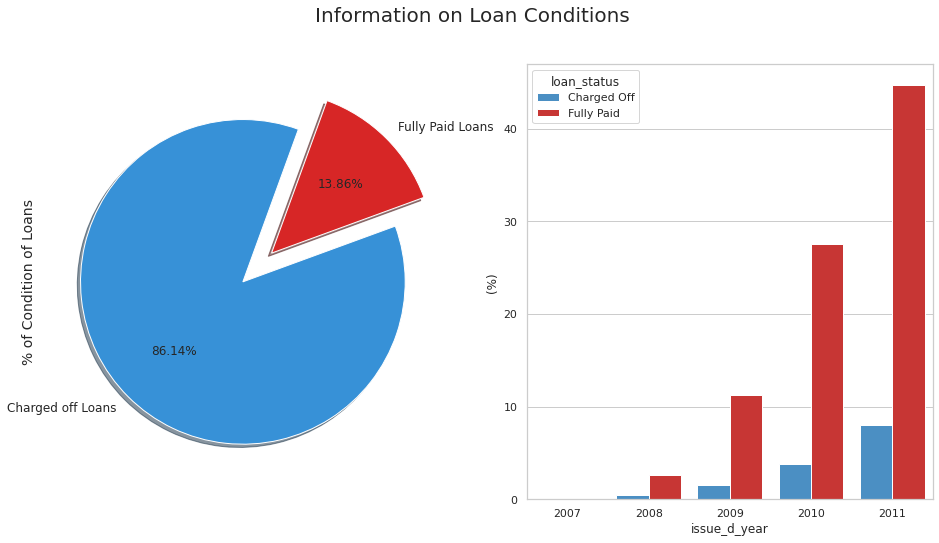

In [38]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#3791D7", "#D72626"]
labels ="Charged off Loans", "Fully Paid Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

loan["loan_status"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)

ax[0].set_ylabel('% of Condition of Loans', fontsize=14)
palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="issue_d_year", y="loan_amnt", hue="loan_status", data=loan, palette=palette, estimator=lambda x: len(x) / len(loan) * 100)
ax[1].set(ylabel="(%)")

[**Bivariate Analysis**](https://https://en.wikipedia.org/wiki/Bivariate_analysis)

*Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.*

Building on Univariate Analysis, We can go ahead and start with Relationship between different variables in the dataset.

We performed Correlation for each Non-Categorical Data, i.e. Continuous data column to find any Correlations 

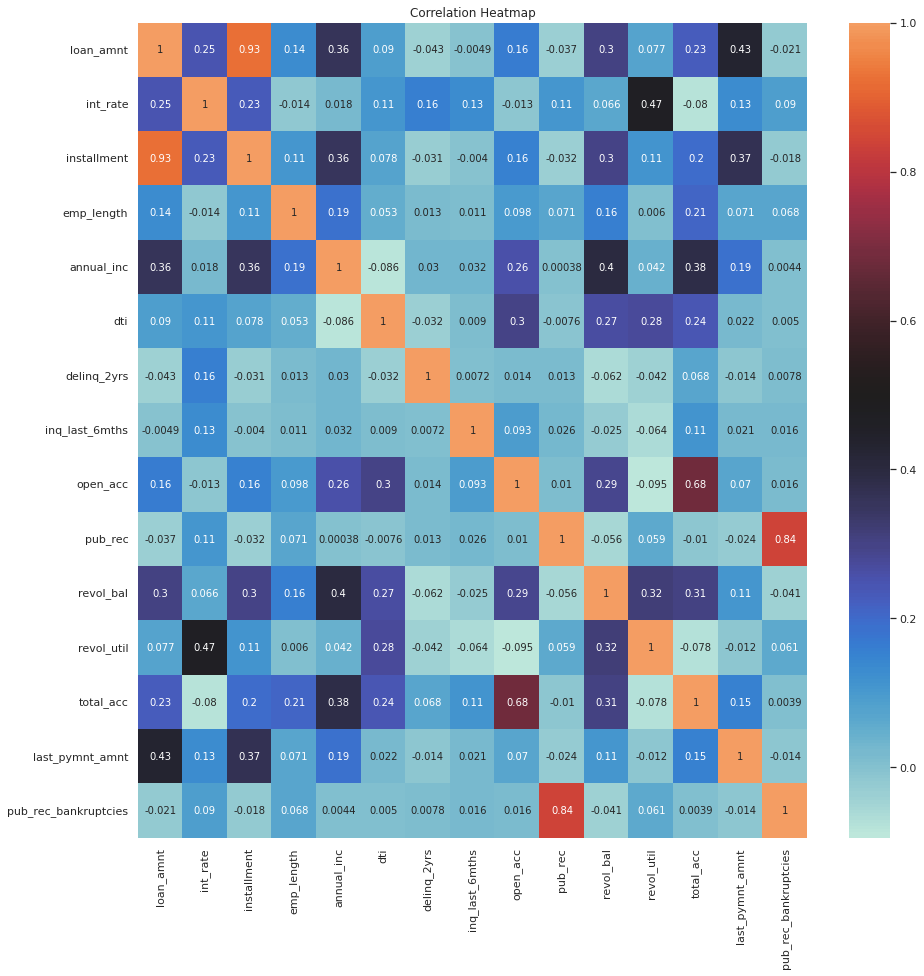

In [39]:
# Plotting Heatmap for Continuous Data Columns
plt.figure(figsize=(15,15))
plt.title("Correlation Heatmap")
non_cat_cols = ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr_data = loan[non_cat_cols].corr()
sns.heatmap(corr_data, annot=True, center=0.5)

There is coorelation between Installments and Loan Amount is 92% which is obvious in this senario since higher the Loan amount higher will be the Installments.

This is a perfect example of *Correlation does not imply causation*

We could not derive much of insights from correlation of variables that can add any value to business decesion making.

Next, We look for different trends in the Business, like any othere busiess, there is an expectation of seasonal trends for demand and supply.

Here we come across an interesting trend lines for seasonal variation in demand. And hence we can point this parameters as our 2nd Driver Point.

**Driver Point No.2**


1.   There is trend of higher demand in Winters than compared to Summers.
2.   The business can increase more lending of money with help of discout offers or other sales tactics during summer to attract more volumes in months with less demand.


In [40]:
# Year/month trends 
trend_median = loan.groupby("issue_d_month",as_index=False).median()['loan_amnt']
trend_mean = loan.groupby("issue_d_month",as_index=False).mean()['loan_amnt']

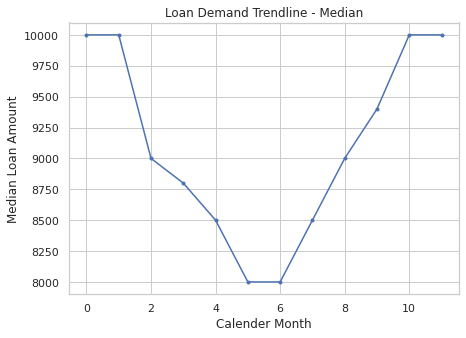

In [41]:
# Plotting Median Trendline for demand in Loan
plt.figure(figsize=(7,5))
plt.title("Loan Demand Trendline - Median")
plt.ylabel("Median Loan Amount")
plt.xlabel("Calender Month")
trend_median.plot.line(x='issue_d_month', y='loan_amnt', style='.-')

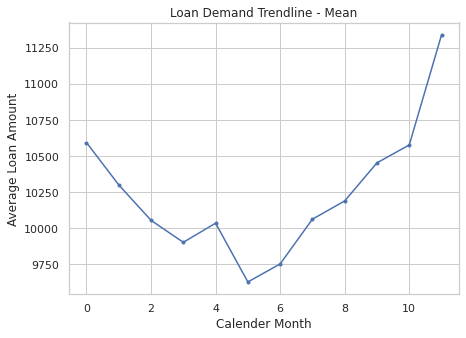

In [42]:
# Plotting Mean Trendline for demand in Loan
plt.figure(figsize=(7,5))
plt.title("Loan Demand Trendline - Mean")
plt.ylabel("Average Loan Amount")
plt.xlabel("Calender Month")
trend_mean.plot.line(x='issue_d_month', y='loan_amnt', style='.-')

Next, We can check for relation of Geographic Demographs to check for regions which are more likely to Default and more likely to Fully payback the loan.

We have used Map of United States (Shape file) and Geopandas to handle the geometric spatial analysis and giving out a descriptive view of states with higher and lower default rates.

**Driver Point No.3**

Top 5 States with maximum Default Rates
1.   Nevada
2.   Alaska
3.   Tennessee
4.   South Dakota
5.   Hawaii

Top 5 States with Minimum Default Rates
1.   Wyoming
2.   Mississippi
3.   District of Columbia
4.   Kansas
5.   Delaware

Business Implementation:
Make a stringent verification/Higher Interest rates to States with higher default rates and more offers/Discounts to states with lower charged off rates.

In [43]:
# Importing Shape file(map) as geopandas dataframe
us_gpd = gpd.read_file("/content/drive/MyDrive/Upgrad_Project/cb_2016_us_state_500k.shp")

In [44]:
# Dropping off the states which are not part of lending club dataset
unwanted_states = list(set(us_gpd.STUSPS.unique()) - set(loan['addr_state'].unique()))
us_gpd = us_gpd.drop(us_gpd[us_gpd.STUSPS == 'ND'].index)
us_gpd = us_gpd.drop(us_gpd[us_gpd.STUSPS == 'AS'].index)
us_gpd = us_gpd.drop(us_gpd[us_gpd.STUSPS == 'GU'].index)
us_gpd = us_gpd.drop(us_gpd[us_gpd.STUSPS == 'ME'].index)
us_gpd = us_gpd.drop(us_gpd[us_gpd.STUSPS == 'MP'].index)
us_gpd = us_gpd.drop(us_gpd[us_gpd.STUSPS == 'PR'].index)
us_gpd = us_gpd.drop(us_gpd[us_gpd.STUSPS == 'VI'].index)

In [45]:
# Creating a subset of loan with only defaulters
charged_off_df = loan[loan.loan_status == "Charged Off"]

In [46]:
# Preparing data to groupby the states and count of each state defaulters and renaming the column names
df = charged_off_df.groupby(by="addr_state").count()
df['Total_Loan_count'] = loan.groupby(by="addr_state").count().loan_amnt
df = df[['Total_Loan_count', 'loan_amnt']]
df = df.reset_index()
df.rename(columns = {'loan_amnt':'charged_off_loan_count', "addr_state":"STUSPS"}, inplace = True)

In [47]:
# Creating a new column to find percentage of Defaulters in each state
df['perc_charged_off']= (df['charged_off_loan_count']/df['Total_Loan_count']) *100

In [48]:
# Merging Geopandas dataframe and Defaulter's dataframe to bring geometries and data together
final_gdf = pd.merge(df, us_gpd, on='STUSPS', how='left')[['geometry','STUSPS','Total_Loan_count',	'charged_off_loan_count', 'perc_charged_off', 'NAME']]

In [49]:
# Converting pandas dataframe to geopandas dataframe
final_gdf = gpd.GeoDataFrame(final_gdf, crs="EPSG:4326", geometry='geometry')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




2

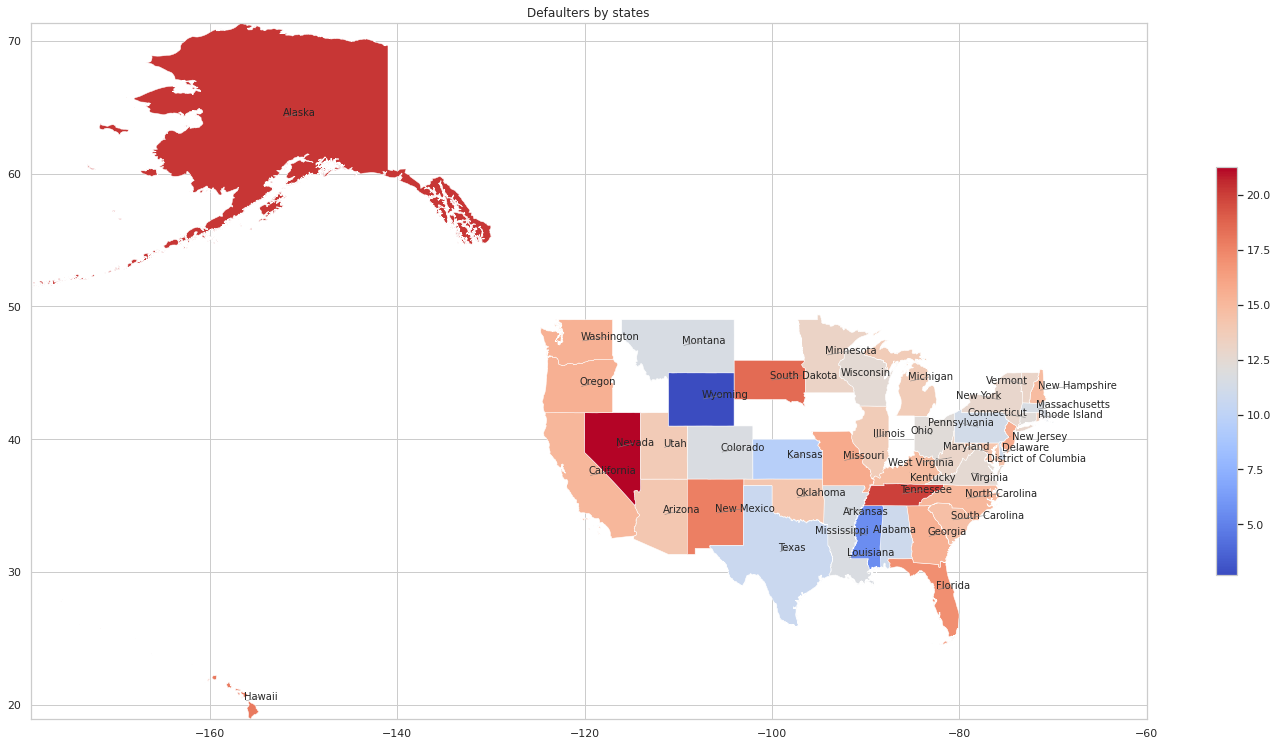

In [50]:
# Getting Centroid of each polygon(state) in the map and creating points in it, 
# this will facilitate as an placeholder for state name in the map for better visualization
za = final_gdf
final_gdf["center"] = final_gdf["geometry"].centroid
za_points = final_gdf.copy()
za_points.set_geometry("center", inplace = True)

fig, ax = plt.subplots(figsize = (25,25))
final_gdf.plot(ax=ax, column='perc_charged_off', cmap='coolwarm', legend=True, legend_kwds={'shrink': 0.3}, linewidth = 0.5)
ax.set_title('Defaulters by states')
minx, miny, maxx, maxy = final_gdf.total_bounds
ax.set_xlim(minx, -60)
ax.set_ylim(miny, maxy)
texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["NAME"]):
    texts.append(plt.text(x, y, label, fontsize = 10))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

In [51]:
# Top 5 States with Highest Default rates
final_gdf.sort_values(by="perc_charged_off", ascending=False).head(5)[['perc_charged_off', 'NAME']]

,perc_charged_off,NAME
27,21.256039,Nevada
0,20.312500,Alaska
36,20.000000,Tennessee
35,18.518519,South Dakota
11,17.931034,Hawaii


In [52]:
# Top 5 States with Lowest Default rates
final_gdf.sort_values(by="perc_charged_off", ascending=True).head(5)[['perc_charged_off', 'NAME']]

,perc_charged_off,NAME
44,2.702703,Wyoming
21,5.555556,Mississippi
7,5.586592,District of Columbia
13,9.589041,Kansas
37,10.693512,Texas


Another Driving Factor is for to findout purpose for which the loan is issued. This can be an important parameter for the busiess to figure out the behaviors of the repayment.

Here, from the graph, we can derive our next driver point.

**Driver Point No.4**

1. Small Business tends to make largest category of loan defaults
2. Vacation is tends to make least category of loan which are charged off



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Average loan amount issued')

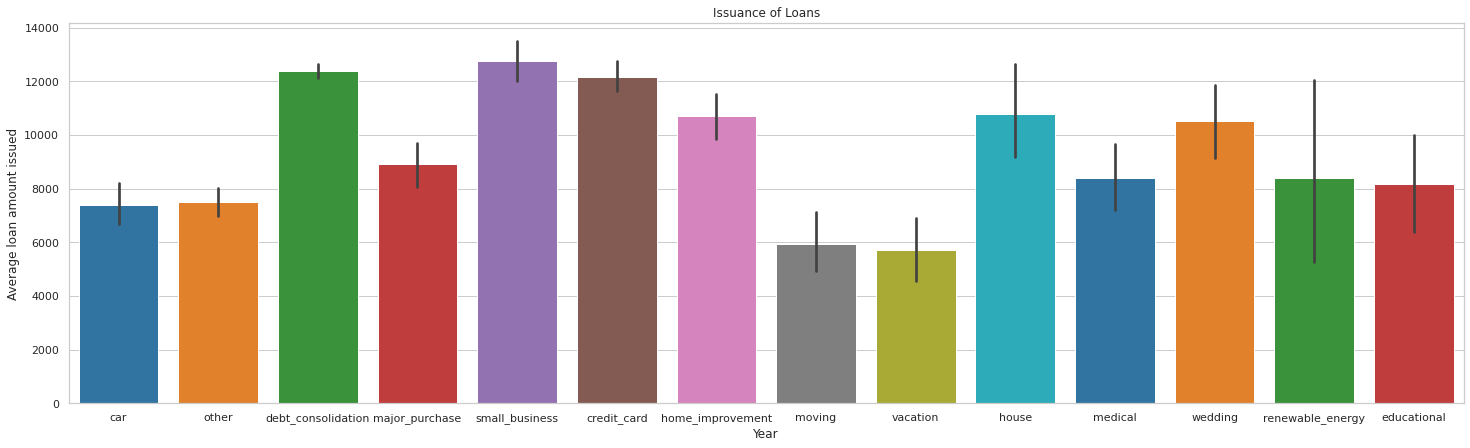

In [53]:
plt.figure(figsize=(25,7))
sns.barplot('purpose', 'loan_amnt', data=charged_off_df, palette='tab10')
plt.title('Issuance of Loans')
plt.xlabel('Year')
plt.ylabel('Average loan amount issued')

Pulic Records of Bankruptcies can also tend to show strong relations for defaulting the loan.

**Driver Point No.5**
1. The Graph Suggest that Members with record of bankruptices in category 2 tend to default the rate by 40%. This is a very high risk zone as a loan provider
2. Members in category 1 of Bankruptices tend to default less compared to category 2 and 3

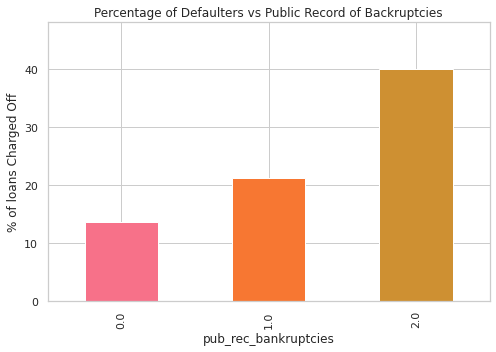

In [54]:
# Plotting Graph for Percentage of Defaulters vs Public Record of Backruptcies
plt.figure(figsize=(7,5))
plt.title("Percentage of Defaulters vs Public Record of Backruptcies")
grp = loan.groupby(['loan_status','pub_rec_bankruptcies'])['pub_rec_bankruptcies'].count()
cnt = loan.groupby('pub_rec_bankruptcies')['pub_rec_bankruptcies'].count()
percentages = grp.unstack() * 100 / cnt.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
ax.set_ylabel('% of loans Charged Off')
plt.margins(0.2, 0.2)
plt.tight_layout()

Ownership status of house also tend to show strong relations for defaulting the loan.

**Driver Point No.6**
1. Members with house ownership status as "Others" tend to default the rate by 18%.
2. Whereas, Members in category of Mortgage and own house tend to default less compared to other categories.

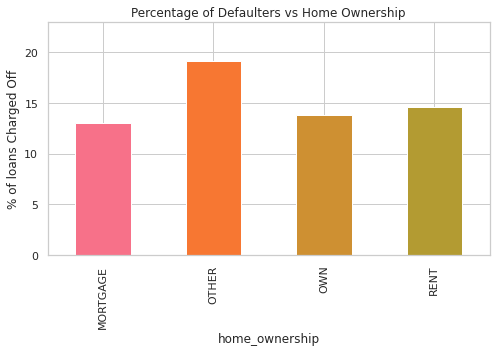

In [55]:
# Plotting Graph for Percentage of Defaulters vs Home Ownership
plt.figure(figsize=(7,5))
plt.title("Percentage of Defaulters vs Home Ownership")
grp = loan.groupby(['loan_status','home_ownership'])['home_ownership'].count()
cnt = loan.groupby('home_ownership')['home_ownership'].count()
percentages = grp.unstack() * 100 / cnt.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
ax.set_ylabel('% of loans Charged Off')
plt.margins(0.2, 0.2)
plt.tight_layout()